In [11]:
import sklearn 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [12]:
data = pd.read_csv('/home/thesun/Script/deep_learning/AI_papers_classification/scraping/paper_abs_task.csv').drop('Unnamed: 0', axis=1)
data.head()

,abstract,task
0,The problem of AMR-to-text generation is to re...,NLP
1,Natural language generation of coherent long t...,NLP
2,In this paper we explore the effect of archite...,NLP
3,We consider the problem of parsing natural lan...,NLP
4,Adversarial attacks against natural language p...,NLP


In [13]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5, 
    norm='l2', 
    encoding='latin-1', 
    ngram_range=(1, 2), 
    stop_words='english'
)
features = tfidf.fit_transform(data.abstract).toarray()
labels = data.task
features.shape

(1296, 4775)

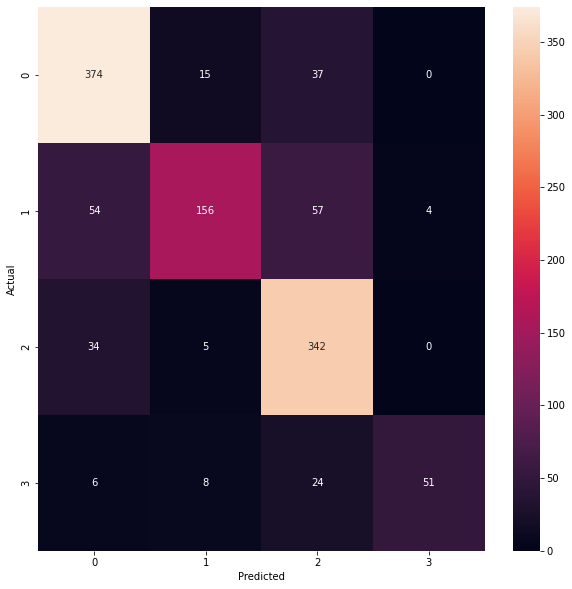

In [30]:
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
import pickle
pickle.dump(model, open('model.pkl', 'wb') )
pickle.dump(tfidf, open('tfidf.pkl', 'wb') )